## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [15]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [16]:
columns = ["City Name", "Package", "Variety", "Origin", "Item Size", "Color"]
new_pumpkins = full_pumpkins.loc[:, columns]

new_pumpkins.dropna(inplace=True)
new_pumpkins

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
...,...,...,...,...,...,...
1694,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1695,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1696,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1697,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE


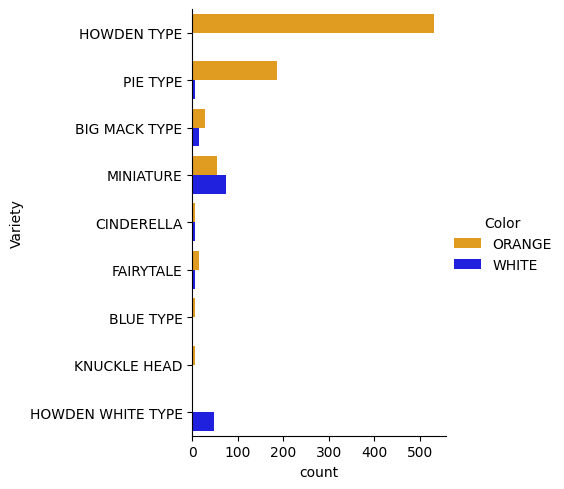

In [17]:
import seaborn as sns

colors = { "ORANGE": "orange", "WHITE": "blue" }

sns.catplot(
    data=new_pumpkins, y="Variety", hue="Color", kind="count",
    palette=colors
)

In [18]:
print(new_pumpkins["Item Size"].unique())

['med' 'lge' 'sml' 'xlge' 'med-lge' 'jbo' 'exjbo']


In [28]:
from sklearn.preprocessing import OrdinalEncoder

# encode size as a number
sizes = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_column = ["Item Size"]
order_encoder = OrdinalEncoder(categories=sizes, dtype=np.intc)


In [29]:
from sklearn.preprocessing import OneHotEncoder

# encode columns that don't have order as different columns with 0 and 1
one_hot_column = ["City Name", "Package", "Variety", "Origin"]
one_hot_encoder = OneHotEncoder(sparse_output=False, dtype=np.intc)

In [30]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('orc', order_encoder, ordinal_column),
    ('cat', one_hot_encoder, one_hot_column)
])

ct.set_output(transform="pandas")
updated_pumpkins = ct.fit_transform(new_pumpkins)
updated_pumpkins

,orc__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1695,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(new_pumpkins.Color)
encoded_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
all_pumpkins = updated_pumpkins.assign(Color=encoded_labels)
all_pumpkins.tail()

,orc__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
1694,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1695,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1696,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1697,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1698,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# just to check that transformaion is right
label_encoder.inverse_transform([0, 1])

array(['ORANGE', 'WHITE'], dtype=object)

/home/vlad/experiments/ML-For-Beginners/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


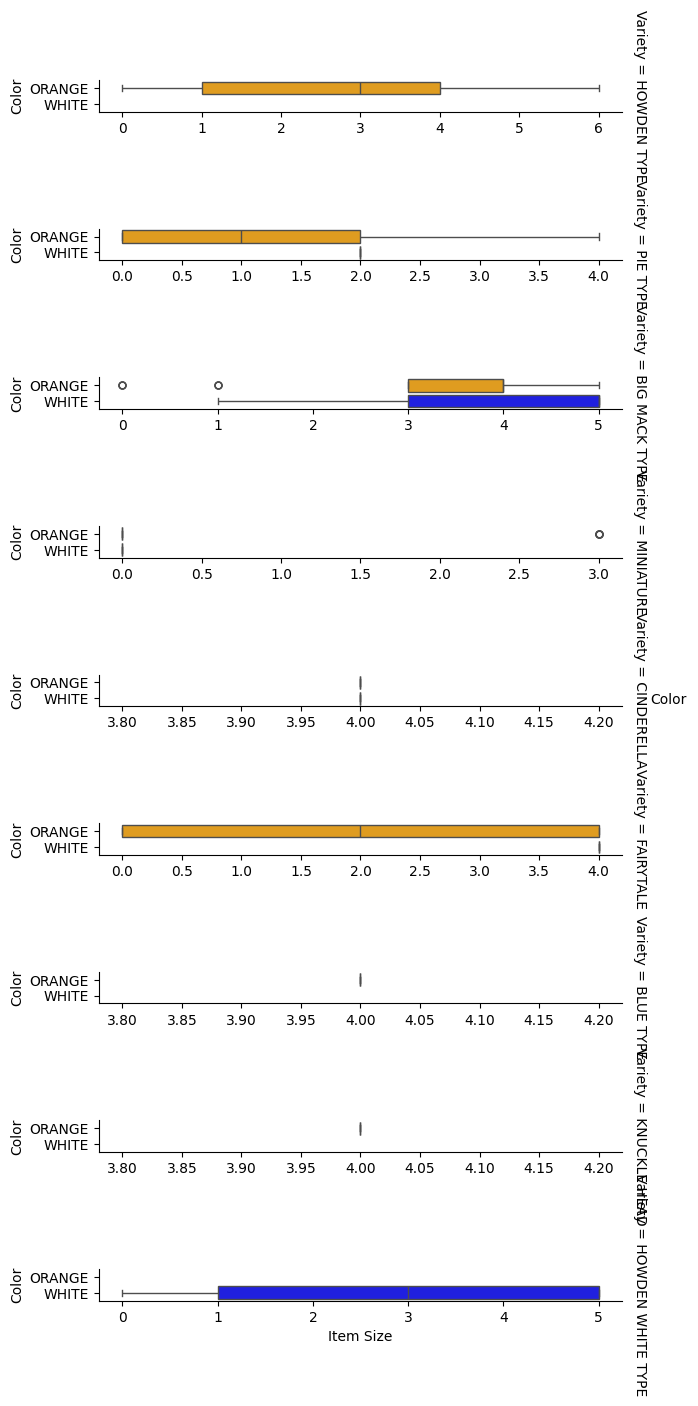

In [39]:
new_pumpkins["Item Size"] = all_pumpkins["orc__Item Size"]
g = sns.catplot(
    data=new_pumpkins,
    x="Item Size", y="Color", row="Variety",
    kind="box", orient="h", hue="Color",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4, palette=colors
)

/home/vlad/experiments/ML-For-Beginners/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vlad/experiments/ML-For-Beginners/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='orc__Item Size'>

/home/vlad/experiments/ML-For-Beginners/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vlad/experiments/ML-For-Beginners/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


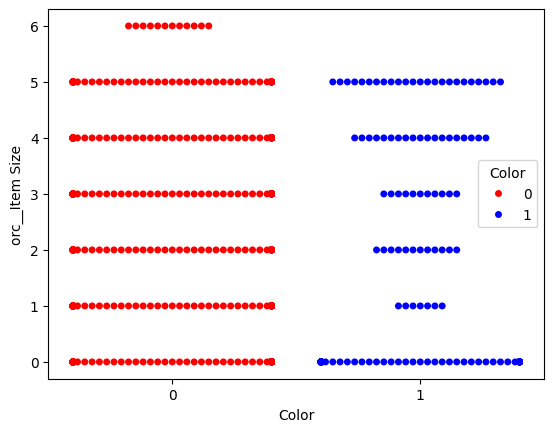

In [43]:
sns.swarmplot(
    x="Color", y="orc__Item Size", data=all_pumpkins, hue="Color", palette={ 0: "red", 1: "blue" }
)

In [46]:
# x = all_pumpkins.drop(columns=["Color"])
x = all_pumpkins[all_pumpkins.columns.difference(["Color"])]

y = all_pumpkins.Color


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [49]:
print(classification_report(y_test, pred))
print(f'Predictions {pred}')
print(f'F1-score {f1_score(y_test, pred)}')

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score 0.7457627118644068


In [50]:
from sklearn.metrics import confusion_matrix

# it shows us how many true guesses we made for each value. Right guesses are in the diagonal
# First row is the first color predictions: [162, 4] means we predicted 162 right and 4 white pumpkins as Orange pumpkin
confusion_matrix(y_test, pred)

array([[162,   4],
       [ 11,  22]])

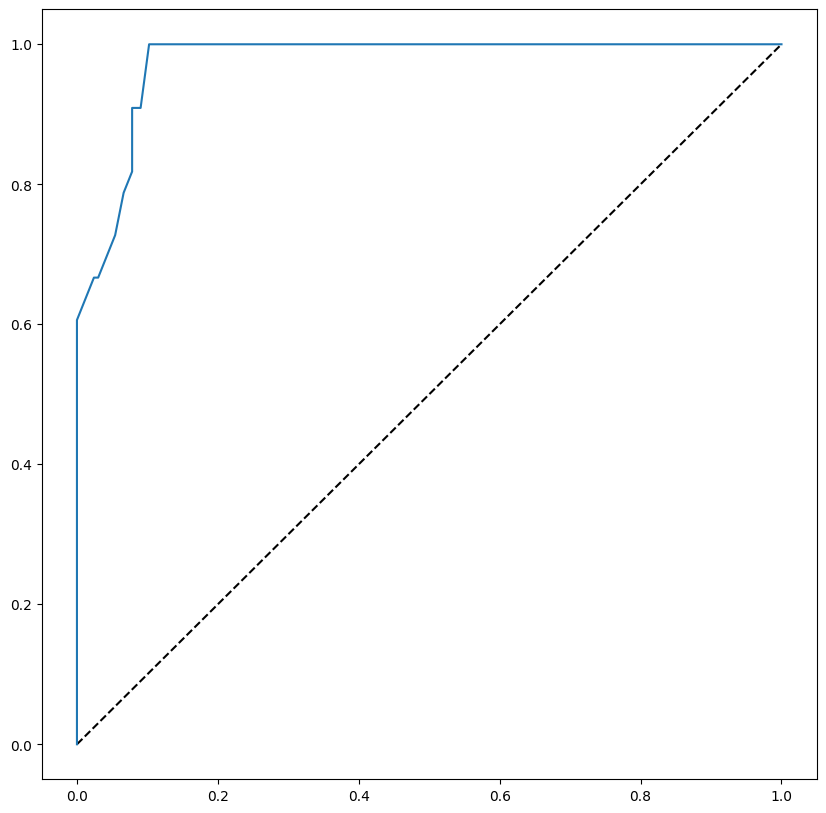

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt

# we can use this `magic command` to show plots for the card without calling plt.show()
%matplotlib inline

# Use predict_proba to get probability estimates for each class
# it just returns a probability for each class, we can use them 
y_score = model.predict_proba(x_test)

# The resulting 'probabilities' array will have two columns for binary classification
# For each row, the first column corresponds to the probability of class 0, and the second column corresponds to the probability of class 1.

# calc Receiver Operating Characteristic
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:, 1])

fig = plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(false_positive_rate, true_positive_rate)

In [69]:
# calculate an area under the curve, ideal are should be 1
auc = roc_auc_score(y_test, y_score[:, 1])
auc

0.9749908725812341

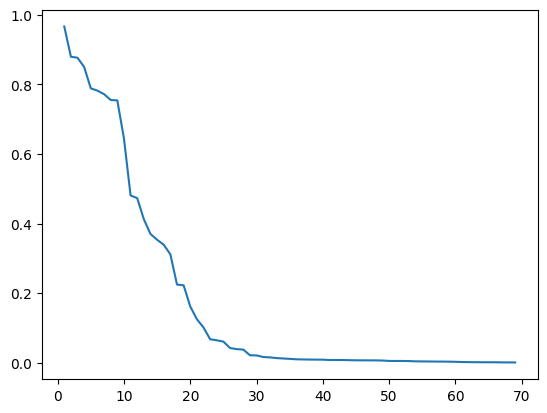

In [70]:
plt.plot(range(0, len(thresholds)), thresholds)